# Polynomial regression
En muchas ocasiones la relación entre los datos no va a ser lineal, por lo que una simple regresión lineal no se va a ajustar bien a nuestra problemática.

Por ejemplo, en el siguiente ejmplo encajaria muy bien una regresión lineal.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/salary_data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


<AxesSubplot: xlabel='YearsExperience', ylabel='Salary'>

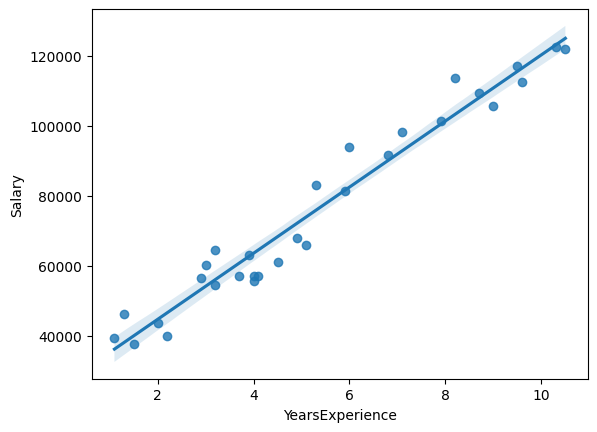

In [2]:
sns.regplot(x="YearsExperience", y="Salary", data=df)

En la vida real los problemas son más complejos, ya que los salarios no llevan una subida lineal vs años de experiencia, dependerá también de la carrera profesional: profesor, ingeniero, doctor...

Otra posible representación del salario podría ser en función del puesto de trabajo.

In [3]:
df = pd.read_csv('data/position_salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


<AxesSubplot: xlabel='Level', ylabel='Salary'>

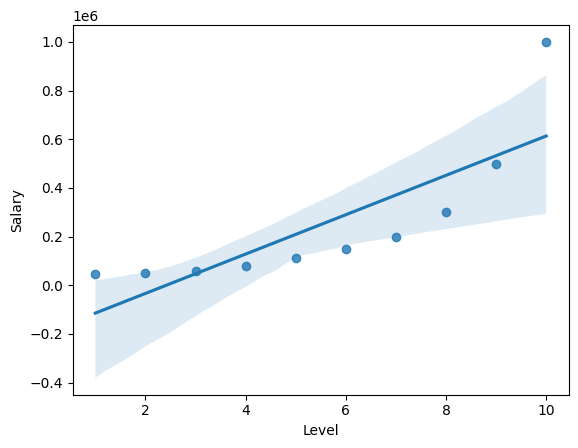

In [5]:
sns.regplot(x="Level", y="Salary", data=df)

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
X = df[["Level"]].copy()
y = df["Salary"]

lin_reg.fit(X, y)

LinearRegression()

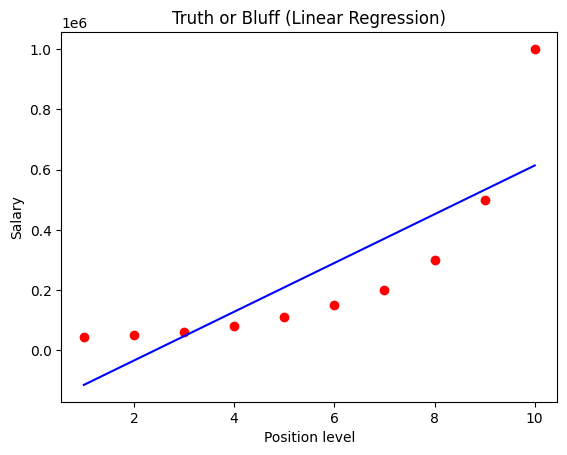

In [8]:
# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()

Vemos que en este caso, la regresión lineal no se ajusta nada bien a los datos, por lo que habrá que probar otras alternativas.

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

`PolynomialFeatures` de sklearn genera nuevas features sintéticas, realizando todas las combinaciones posibles entre las potencias. Si degree = 3 y tenemos dos features (a, b), realizará a^2, b^2, b^3, b^3, ab, a^2b, ab^2

In [32]:
poly_reg = PolynomialFeatures(degree=3, include_bias=False)
pol_reg = LinearRegression()

pol_reg.fit(poly_reg.fit_transform(X), y)

LinearRegression()

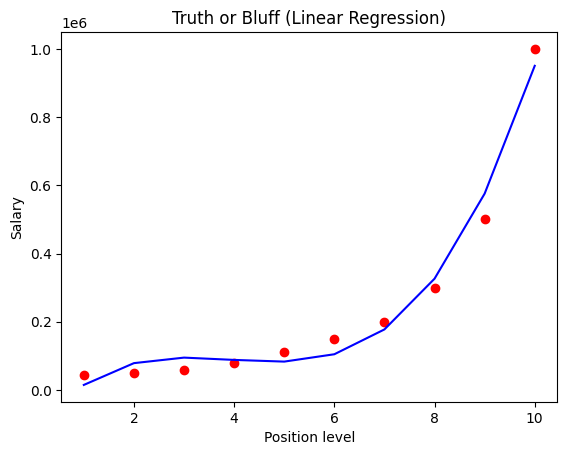

In [33]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.transform(X)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

Al añadir mucha complejidad podemos sobreajustar el modelo fácilmente